# Mammogram assignment

Data:

1. BI-RADS assessment: 1 to 5 (ordinal)  
2. Age: patient's age in years (integer)
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. Severity: benign=0 or malignant=1 (binominal)

# Library

In [80]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Loading data

In [37]:
data = pd.read_table(".\MLCourse\mammographic_masses.data.txt", sep = ",",
                     names= ["bi-rads","age","shape","margin","density","severity"])
print(data.shape)
data.head(10)

(961, 6)


,bi-rads,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
5,4,65,1,?,3,0
6,4,70,?,?,3,0
7,5,42,1,?,3,0
8,5,57,1,5,3,1
9,5,60,?,5,1,1


In [21]:
data.dtypes

bi-rads     object
age         object
shape       object
margin      object
density     object
severity     int64
dtype: object

# Cleaning data

Looking for strange data

In [3]:
data[data.eq("?").any(axis=1)]

,bi-rads,age,shape,margin,density,severity
1,4,43,1,1,?,1
4,5,74,1,5,?,1
5,4,65,1,?,3,0
6,4,70,?,?,3,0
7,5,42,1,?,3,0
...,...,...,...,...,...,...
778,4,60,?,4,3,0
819,4,35,3,?,2,0
824,6,40,?,3,4,1
884,5,?,4,4,3,1


In [4]:
for column in data.columns:
    print(column + ":")
    print(np.unique(data[column]))

bi-rads:
['0' '2' '3' '4' '5' '55' '6' '?']
age:
['18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31'
 '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45'
 '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59'
 '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72' '73'
 '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86' '87'
 '88' '93' '96' '?']
shape:
['1' '2' '3' '4' '?']
margin:
['1' '2' '3' '4' '5' '?']
density:
['1' '2' '3' '4' '?']
severity:
[0 1]


In [38]:
data.isnull().sum()

bi-rads     0
age         0
shape       0
margin      0
density     0
severity    0
dtype: int64

It's necessary to change "?" value for missing/NA value

In [39]:
data = data.replace('?', np.nan)
data[data.eq("?").any(axis=1)]

,bi-rads,age,shape,margin,density,severity


In [40]:
data.isnull().sum()/data.shape[0]

bi-rads     0.002081
age         0.005203
shape       0.032258
margin      0.049948
density     0.079084
severity    0.000000
dtype: float64

In [26]:
data.dtypes

bi-rads     object
age         object
shape       object
margin      object
density     object
severity     int64
dtype: object

Change to numeric (int) variables that are as 'object' type

In [41]:

for column in ['bi-rads', 'age', 'shape', 'margin', 'density']:
    data[column] = pd.array(data[column], dtype="Int64")
data.dtypes

bi-rads     Int64
age         Int64
shape       Int64
margin      Int64
density     Int64
severity    int64
dtype: object

# Exploring data

In [83]:
for column in data.columns:
    print(column + ":")
    print(np.unique(data[column],return_counts=True))

bi-rads:
(array([ 0.,  2.,  3.,  4.,  5.,  6., 55., nan]), array([  5,  14,  36, 547, 345,  11,   1,   2], dtype=int64))
age:
(array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 93., 96., nan]), array([ 1,  4,  1,  6,  3,  7,  4,  3,  2,  6,  5,  3,  3,  7,  6,  9,  9,
       13, 11,  8,  9, 11, 19, 16, 19, 20, 18, 21, 28, 13, 11, 23, 21, 16,
       20, 24, 25, 26, 23, 32, 23, 36, 25, 13, 25, 24, 27, 25, 31, 32, 20,
       12, 13, 22, 17,  9, 12,  7, 17,  9,  4,  8, 11,  2,  1,  5,  3,  4,
        5,  5,  1,  1,  1,  5], dtype=int64))
shape:
(array([ 1.,  2.,  3.,  4., nan]), array([224, 211,  95, 400,  31], dtype=int64))
margin:
(array([ 1.,  2.

In [84]:
data.describe().round(2)

,bi-rads,age,shape,margin,density,severity
count,959.0,956.0,930.0,913.0,885.0,961.00
mean,4.35,55.49,2.72,2.8,2.91,0.46
std,1.78,14.48,1.24,1.57,0.38,0.50
min,0.0,18.0,1.0,1.0,1.0,0.00
25%,4.0,45.0,2.0,1.0,3.0,0.00
50%,4.0,57.0,3.0,3.0,3.0,0.00
75%,5.0,66.0,4.0,4.0,3.0,1.00
max,55.0,96.0,4.0,5.0,4.0,1.00


In [85]:
data.corr().round(3)

,bi-rads,age,shape,margin,density,severity
bi-rads,1.000,0.095,0.186,0.163,0.039,0.232
age,0.095,1.000,0.364,0.411,0.029,0.432
shape,0.186,0.364,1.000,0.742,0.079,0.563
margin,0.163,0.411,0.742,1.000,0.109,0.575
density,0.039,0.029,0.079,0.109,1.000,0.064
severity,0.232,0.432,0.563,0.575,0.064,1.000


In [223]:
data['age'][~np.isnan(data['age'])]

0      67
1      43
2      58
3      28
4      74
       ..
956    47
957    56
958    64
959    66
960    62
Name: age, Length: 961, dtype: Int64

In [224]:
np.unique(~np.isnan(data['age']),return_counts=True)

(array([ True]), array([961], dtype=int64))

In [225]:
data.shape

(961, 6)

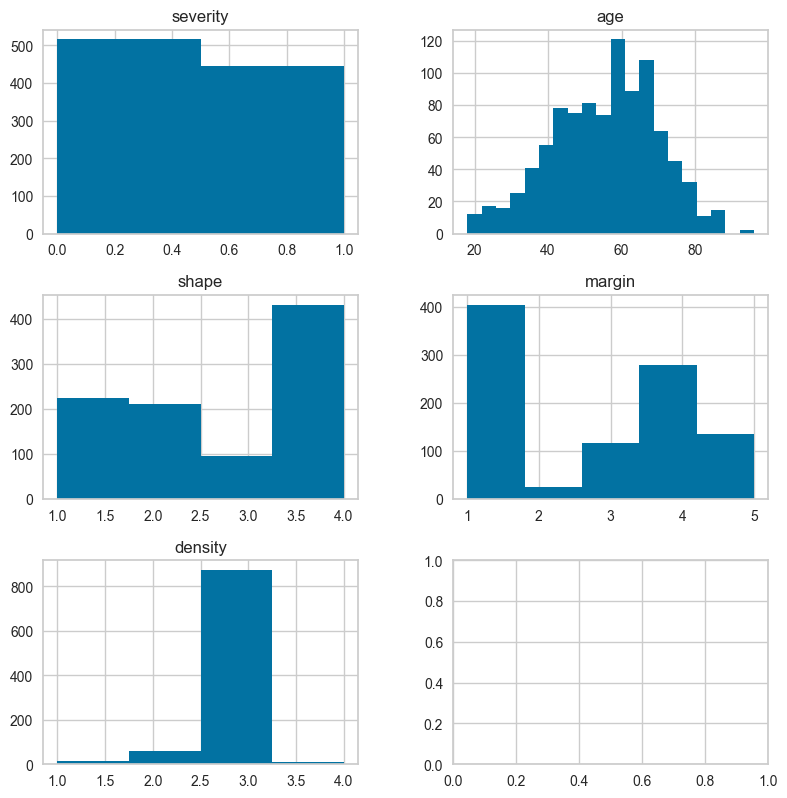

In [251]:
fig, axes = plt.subplots(3, 2, figsize=(8, 8))
fig.tight_layout()
data.hist('severity', bins=2, ax=axes[0,0])
data.hist('age', bins=20, ax=axes[0,1])
data.hist('shape', bins=4, ax=axes[1,0])
data.hist('margin', bins=5, ax=axes[1,1])
data.hist('density', bins=4, ax=axes[2,0])
#		
plt.show()

# Modeling

The objetive is to create a classification model that identifies if the cancer is beging ou malignant.

Algorithms tested:
 
* Decision tree
* Random forest
* SVM
* Logistic Regression
* XGBoost
* Neural Network using Keras.

In [64]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_val_score #cv=cross validation

## Preparing data

In [42]:
data.head(5)

,bi-rads,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,<NA>,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,<NA>,1


As exists missing values, I'm going to make three datasets to compare results: one with rows with missing extracted, the second with missing values imputed by KNN method and the third with missing data replaced by the mode.

In [43]:
data_nomiss = data.dropna(axis=0)
data_nomiss.shape

(830, 6)

In [44]:
data_nomiss.shape[0]/data.shape[0]

0.8636836628511967

In [45]:
X_nomiss = data_nomiss.iloc[:,1:5].values
y_nomiss = data_nomiss['severity'].values
X_nomiss, y_nomiss[0:5]

(array([[67, 3, 5, 3],
        [58, 4, 5, 3],
        [28, 1, 1, 3],
        ...,
        [64, 4, 5, 3],
        [66, 4, 5, 3],
        [62, 3, 3, 3]], dtype=object),
 array([1, 1, 0, 1, 1], dtype=int64))

Imputing value with KNN

In [46]:
from sklearn.impute import KNNImputer

In [47]:
data.describe().round(2)

,bi-rads,age,shape,margin,density,severity
count,959.0,956.0,930.0,913.0,885.0,961.00
mean,4.35,55.49,2.72,2.8,2.91,0.46
std,1.78,14.48,1.24,1.57,0.38,0.50
min,0.0,18.0,1.0,1.0,1.0,0.00
25%,4.0,45.0,2.0,1.0,3.0,0.00
50%,4.0,57.0,3.0,3.0,3.0,0.00
75%,5.0,66.0,4.0,4.0,3.0,1.00
max,55.0,96.0,4.0,5.0,4.0,1.00


In [48]:
data.head()

,bi-rads,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,<NA>,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,<NA>,1


In [49]:
knnImputer = KNNImputer(n_neighbors=2)
data_knn = knnImputer.fit_transform(data)
data_knn = pd.DataFrame(data=data_knn, columns=data.columns)
data_knn.head()

,bi-rads,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1.0
1,4.0,43.0,1.0,1.0,3.0,1.0
2,5.0,58.0,4.0,5.0,3.0,1.0
3,4.0,28.0,1.0,1.0,3.0,0.0
4,5.0,74.0,1.0,5.0,3.0,1.0


In [50]:
X_knn = data_knn.iloc[:,1:5].values
y_knn = data_knn['severity'].values
X_knn, y_knn[0:5]

(array([[67.,  3.,  5.,  3.],
        [43.,  1.,  1.,  3.],
        [58.,  4.,  5.,  3.],
        ...,
        [64.,  4.,  5.,  3.],
        [66.,  4.,  5.,  3.],
        [62.,  3.,  3.,  3.]]),
 array([1., 1., 1., 0., 1.]))

Imputing value with mode

In [51]:
data_mode = data
data_mode.isnull().sum()

bi-rads      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

In [52]:
mode_dict = dict()
for colum in ['age', 'shape', 'margin', 'density']:
    mode_dict[colum] = data_mode[colum].mode()[0]

#mode_dict
data_mode[['age', 'shape', 'margin', 'density']] = data_mode[['age', 'shape', 'margin', 'density']].fillna(value=mode_dict)
data_mode.isnull().sum()

bi-rads     2
age         0
shape       0
margin      0
density     0
severity    0
dtype: int64

In [53]:
X_mode = data_mode.iloc[:,1:5].values
y_mode = data_mode['severity'].values
X_mode, y_mode[0:5]

(array([[67, 3, 5, 3],
        [43, 1, 1, 3],
        [58, 4, 5, 3],
        ...,
        [64, 4, 5, 3],
        [66, 4, 5, 3],
        [62, 3, 3, 3]], dtype=object),
 array([1, 1, 1, 0, 1], dtype=int64))

Spliting into training and test data.

In [19]:
from sklearn.model_selection import train_test_split

In [54]:
x_nomiss_training, x_nomiss_test, y_nomiss_training, y_nomiss_test = train_test_split(X_nomiss,y_nomiss,
                                                          test_size = 0.15,
                                                          random_state = 0)


In [55]:
x_nomiss_training.shape, x_nomiss_test.shape, y_nomiss_training.shape, y_nomiss_test.shape

((705, 4), (125, 4), (705,), (125,))

In [56]:
x_knn_training, x_knn_test, y_knn_training, y_knn_test = train_test_split(X_knn,y_knn,
                                                          test_size = 0.15,
                                                          random_state = 0)

In [57]:
x_knn_training.shape, x_knn_test.shape, y_knn_training.shape, y_knn_test.shape

((816, 4), (145, 4), (816,), (145,))

In [58]:
x_mode_training, x_mode_test, y_mode_training, y_mode_test = train_test_split(X_mode,y_mode,
                                                          test_size = 0.15,
                                                          random_state = 0)

In [59]:
x_mode_training.shape, x_mode_test.shape, y_mode_training.shape, y_mode_test.shape

((816, 4), (145, 4), (816,), (145,))

Normalizing data.

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
x_nomiss_training_scaled = scaler.fit_transform(x_nomiss_training)
x_nomiss_test_scaled = scaler.fit_transform(    x_nomiss_test)
X_nomiss_scaled = scaler.fit_transform(         X_nomiss)

In [62]:
scaler = StandardScaler()
x_knn_training_scaled = scaler.fit_transform(x_knn_training)
x_knn_test_scaled = scaler.fit_transform(    x_knn_test)
X_knn_scaled = scaler.fit_transform(         X_knn)

In [63]:
scaler = StandardScaler()
x_mode_training_scaled = scaler.fit_transform(x_mode_training)
x_mode_test_scaled = scaler.fit_transform(    x_mode_test)
X_mode_scaled = scaler.fit_transform(         X_mode)

## Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
parameters = {'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_split': [1,2,5],
              'min_samples_leaf' : [1,2,5]}
grid_search_nomiss = GridSearchCV(estimator = DecisionTreeClassifier(random_state=0),param_grid = parameters, cv=5)
grid_search_nomiss.fit(X_nomiss, y_nomiss)
print(grid_search_nomiss.best_params_) , print(grid_search_nomiss.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}
0.7987951807228916


C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    valid

(None, None)

In [124]:
nomiss_tree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 5, min_samples_split = 2, splitter='random',random_state=0)
nomiss_tree.fit(x_nomiss_training,y_nomiss_training)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5, random_state=0,
                       splitter='random')

In [253]:
prediction = nomiss_tree.predict(x_nomiss_test)
accuracy_score(y_nomiss_test,prediction)

0.768

In [126]:
print(classification_report(y_nomiss_test,prediction))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        63
           1       0.77      0.76      0.76        62

    accuracy                           0.77       125
   macro avg       0.77      0.77      0.77       125
weighted avg       0.77      0.77      0.77       125



In [127]:
nomiss_tree.score(x_nomiss_training,
                  y_nomiss_training) #check for overfitting

0.8113475177304964

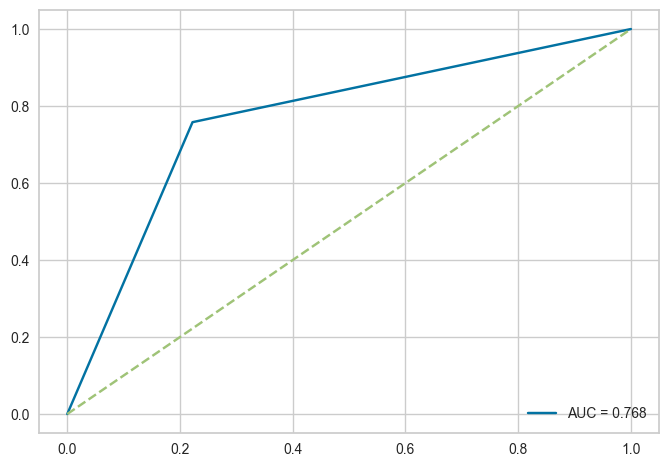

In [128]:
fpr, tpr, thresholds = roc_curve(y_nomiss_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

In [129]:
parameters = {'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_split': [1,2,5],
              'min_samples_leaf' : [1,2,5]}
grid_search_knn = GridSearchCV(estimator = DecisionTreeClassifier(random_state=0),param_grid = parameters, cv=5)
grid_search_knn.fit(X_knn, 
                    y_knn)
print(grid_search_nomiss.best_params_) , print(grid_search_nomiss.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}
0.7987951807228916


C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    valid

(None, None)

In [131]:
knn_tree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 5, min_samples_split = 2, splitter='random',random_state=0)
knn_tree.fit(x_knn_training,y_knn_training)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5, random_state=0,
                       splitter='random')

In [132]:
prediction = knn_tree.predict(x_knn_test)
print(classification_report(y_knn_test,prediction))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84        75
         1.0       0.86      0.77      0.81        70

    accuracy                           0.83       145
   macro avg       0.83      0.83      0.83       145
weighted avg       0.83      0.83      0.83       145



In [133]:
knn_tree.score(x_knn_training,y_knn_training) #check for overfitting

0.8174019607843137

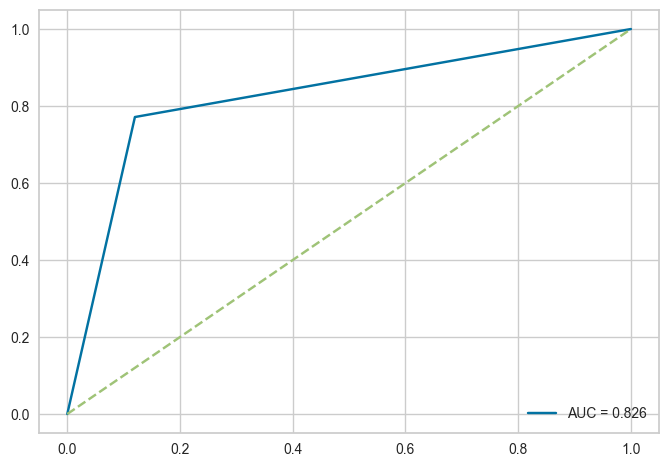

In [134]:
fpr, tpr, thresholds = roc_curve(y_knn_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

In [135]:
parameters = {'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_split': [1,2,5],
              'min_samples_leaf' : [1,2,5]}
grid_search_mode = GridSearchCV(estimator = DecisionTreeClassifier(random_state=0),param_grid = parameters, cv=5)
grid_search_mode.fit(X_mode, 
                    y_mode)
print(grid_search_nomiss.best_params_) , print(grid_search_nomiss.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}
0.7987951807228916


C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    valid

(None, None)

In [136]:
mode_tree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 5, min_samples_split = 2, splitter='random',random_state=0)
mode_tree.fit(x_mode_training,y_mode_training)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5, random_state=0,
                       splitter='random')

In [137]:
prediction = mode_tree.predict(x_mode_test)
print(classification_report(y_mode_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82        75
           1       0.80      0.81      0.81        70

    accuracy                           0.81       145
   macro avg       0.81      0.81      0.81       145
weighted avg       0.81      0.81      0.81       145



In [138]:
mode_tree.score(x_mode_training,
                y_mode_training) #check for overfitting

0.8161764705882353

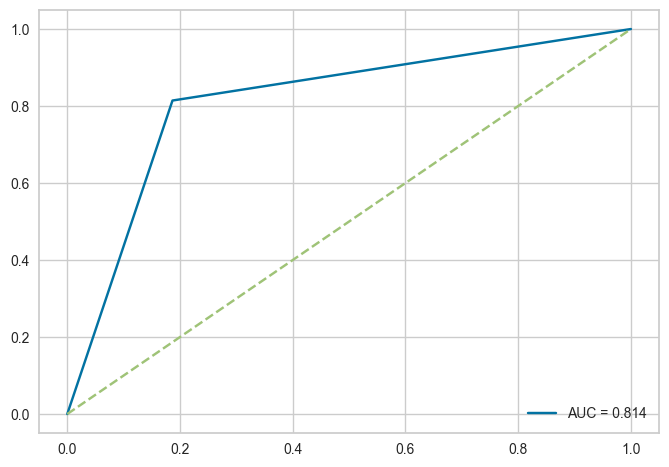

In [139]:
fpr, tpr, thresholds = roc_curve(y_mode_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

### Cross Validation

In [140]:
# no missing data
scores = cross_val_score(DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 5, min_samples_split = 2, splitter='random',random_state=0), 
                         X_nomiss, 
                         y_nomiss, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(3))

[0.783 0.819 0.789 0.819 0.783]
0.799


In [141]:
# knn for missing replacement data
scores = cross_val_score(DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 5, min_samples_split = 2, splitter='random',random_state=0), 
                         X_knn, 
                         y_knn, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(3))

[0.788 0.818 0.807 0.792 0.818]
0.804


In [142]:
# mode for missing replacement data
scores = cross_val_score(DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 5, min_samples_split = 2, splitter='random',random_state=0), 
                         X_mode, 
                         y_mode, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(3))

[0.782 0.812 0.802 0.776 0.755]
0.786


## Random forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
parameters = {'criterion': ['gini','entropy'],
              'n_estimators': [10,40,100,150],
              'min_samples_split': [1,2,5],
              'min_samples_leaf' : [1,2,5]}
grid_search_nomiss = GridSearchCV(estimator = RandomForestClassifier(random_state=0),param_grid = parameters, cv=5)
grid_search_nomiss.fit(X_nomiss, y_nomiss)
print(grid_search_nomiss.best_params_) , print(grid_search_nomiss.best_score_)

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
0.8108433734939758


C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    val

(None, None)

In [108]:
nomiss_forest = RandomForestClassifier(criterion="gini", min_samples_leaf = 5, min_samples_split = 2, n_estimators= 100, random_state=0)
nomiss_forest.fit(x_nomiss_training,y_nomiss_training)

RandomForestClassifier(min_samples_leaf=5, random_state=0)

In [109]:
prediction = nomiss_forest.predict(x_nomiss_test)
print(classification_report(y_nomiss_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        63
           1       0.79      0.81      0.80        62

    accuracy                           0.80       125
   macro avg       0.80      0.80      0.80       125
weighted avg       0.80      0.80      0.80       125



In [110]:
nomiss_forest.score(x_nomiss_training,
                  y_nomiss_training) #check for overfitting

0.8382978723404255

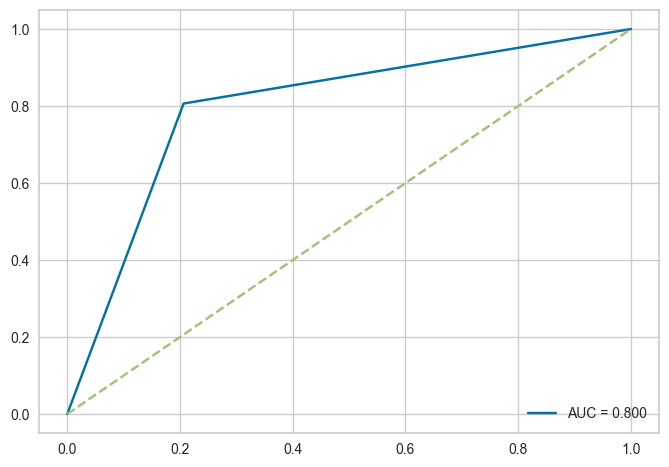

In [111]:
fpr, tpr, thresholds = roc_curve(y_nomiss_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

In [112]:
parameters = {'criterion': ['gini','entropy'],
              'n_estimators': [10,40,100,150],
              'min_samples_split': [1,2,5],
              'min_samples_leaf' : [1,2,5]}
grid_search_knn = GridSearchCV(estimator = RandomForestClassifier(random_state=0),param_grid = parameters, cv=5)
grid_search_knn.fit(X_knn, y_knn)
print(grid_search_knn.best_params_) , print(grid_search_knn.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
0.8158246977547495


C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    val

(None, None)

In [113]:
knn_forest = RandomForestClassifier(criterion="entropy", min_samples_leaf = 5, min_samples_split = 2, n_estimators= 100, random_state=0)
knn_forest.fit(x_knn_training,
               y_knn_training)

RandomForestClassifier(criterion='entropy', min_samples_leaf=5, random_state=0)

In [114]:
prediction = knn_forest.predict(x_knn_test)
print(classification_report(y_knn_test,prediction))

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81        75
         1.0       0.78      0.83      0.81        70

    accuracy                           0.81       145
   macro avg       0.81      0.81      0.81       145
weighted avg       0.81      0.81      0.81       145



In [115]:
knn_forest.score(x_knn_training,
                 y_knn_training) #check for overfitting

0.8284313725490197

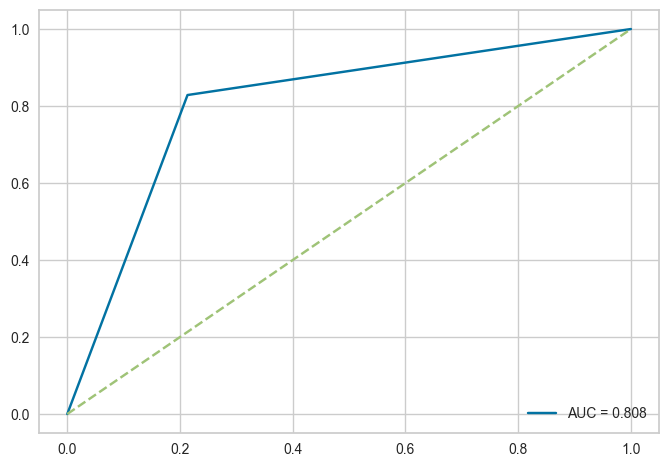

In [116]:
fpr, tpr, thresholds = roc_curve(y_knn_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

In [117]:
parameters = {'criterion': ['gini','entropy'],
              'n_estimators': [10,40,100,150],
              'min_samples_split': [1,2,5],
              'min_samples_leaf' : [1,2,5]}
grid_search_mode = GridSearchCV(estimator = RandomForestClassifier(random_state=0),param_grid = parameters, cv=5)
grid_search_mode.fit(X_mode, y_mode)
print(grid_search_mode.best_params_) , print(grid_search_mode.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
0.8075075561312607


C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    val

(None, None)

In [118]:
mode_forest = RandomForestClassifier(criterion="entropy", min_samples_leaf = 5, min_samples_split = 2, n_estimators= 100, random_state=0)
mode_forest.fit(x_mode_training,
                y_mode_training)

RandomForestClassifier(criterion='entropy', min_samples_leaf=5, random_state=0)

In [119]:
prediction = mode_forest.predict(x_mode_test)
print(classification_report(y_mode_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        75
           1       0.79      0.84      0.81        70

    accuracy                           0.81       145
   macro avg       0.81      0.81      0.81       145
weighted avg       0.82      0.81      0.81       145



In [120]:
mode_forest.score(x_mode_training,
                 y_mode_training) #check for overfitting

0.8235294117647058

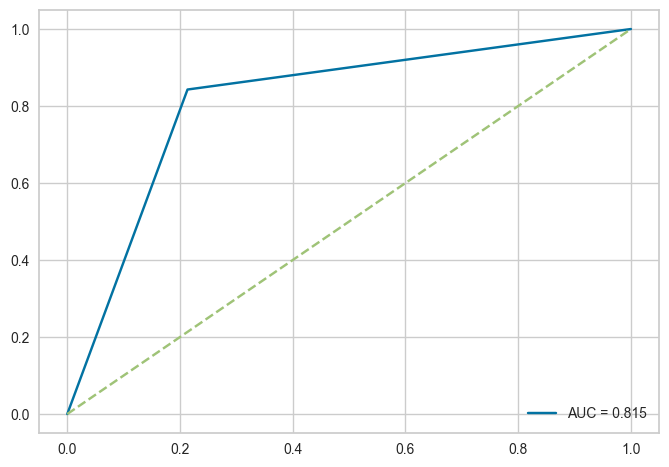

In [121]:
fpr, tpr, thresholds = roc_curve(y_mode_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

### Cross Validation

In [143]:
# no missing data
scores = cross_val_score(RandomForestClassifier(criterion="gini", min_samples_leaf = 5, min_samples_split = 2, n_estimators= 100, random_state=0), 
                         X_nomiss, 
                         y_nomiss, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(3))

[0.777 0.843 0.801 0.819 0.813]
0.811


In [144]:
# knn for missing replacement data
scores = cross_val_score(RandomForestClassifier(criterion="entropy", min_samples_leaf = 5, min_samples_split = 2, n_estimators= 100, random_state=0), 
                         X_knn, 
                         y_knn, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(3))

[0.808 0.844 0.828 0.797 0.802]
0.816


In [145]:
# mode for missing replacement data
scores = cross_val_score(RandomForestClassifier(criterion="entropy", min_samples_leaf = 5, min_samples_split = 2, n_estimators= 100, random_state=0), 
                         X_mode, 
                         y_mode, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(3))

[0.793 0.828 0.807 0.792 0.818]
0.808


## SVM

In [146]:
from sklearn.svm import SVC

In [147]:
parameters = {'tol': [0.001,0.0001,0.00001],
              'C': [1.0,1.5,2.0],
              'kernel' :['rbf','linear','poly','sigmoid']}
grid_search_nomiss = GridSearchCV(estimator = SVC(random_state=0),param_grid = parameters, cv=5)
grid_search_nomiss.fit(X_nomiss_scaled, y_nomiss)
print(grid_search_nomiss.best_params_) , print(grid_search_nomiss.best_score_)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.808433734939759


(None, None)

In [148]:
nomiss_svc = SVC(tol=0.001, C=1.5, kernel='rbf', random_state=0)
nomiss_svc.fit(x_nomiss_training_scaled,
                  y_nomiss_training)

SVC(C=1.5, random_state=0)

In [149]:
prediction = nomiss_svc.predict(x_nomiss_test_scaled)
print(classification_report(y_nomiss_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        63
           1       0.75      0.82      0.78        62

    accuracy                           0.78       125
   macro avg       0.78      0.78      0.78       125
weighted avg       0.78      0.78      0.78       125



In [150]:
nomiss_svc.score(x_nomiss_training_scaled,
                  y_nomiss_training) #check for overfitting

0.8198581560283688

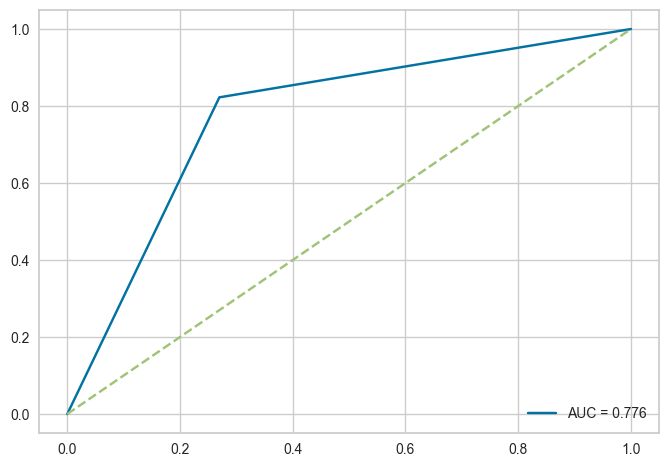

In [151]:
fpr, tpr, thresholds = roc_curve(y_nomiss_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

In [152]:
parameters = {'tol': [0.001,0.0001,0.00001],
              'C': [1.0,1.5,2.0],
              'kernel' :['rbf','linear','poly','sigmoid']}
grid_search_knn = GridSearchCV(estimator = SVC(random_state=0),param_grid = parameters, cv=5)
grid_search_knn.fit(X_knn_scaled, 
                       y_knn)
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

{'C': 2.0, 'kernel': 'rbf', 'tol': 0.001}
0.8075183506044905


In [153]:
knn_svc = SVC(tol=0.001, C=2.0, kernel='rbf', random_state=0)
knn_svc.fit(x_knn_training_scaled,
               y_knn_training)

SVC(C=2.0, random_state=0)

In [154]:
prediction = knn_svc.predict(x_knn_test_scaled)
print(classification_report(y_knn_test,prediction))

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81        75
         1.0       0.79      0.81      0.80        70

    accuracy                           0.81       145
   macro avg       0.81      0.81      0.81       145
weighted avg       0.81      0.81      0.81       145



In [155]:
knn_svc.score(x_knn_training_scaled,
              y_knn_training) #check for overfitting

0.8198529411764706

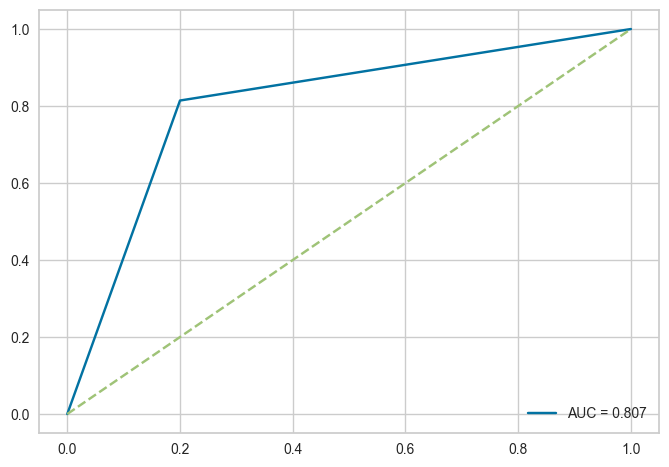

In [156]:
fpr, tpr, thresholds = roc_curve(y_knn_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

In [157]:
parameters = {'tol': [0.001,0.0001,0.00001],
              'C': [1.0,1.5,2.0],
              'kernel' :['rbf','linear','poly','sigmoid']}
grid_search_mode = GridSearchCV(estimator = SVC(random_state=0),param_grid = parameters, cv=5)
grid_search_mode.fit(X_mode_scaled, 
                    y_mode)
print(grid_search_mode.best_params_)
print(grid_search_mode.best_score_)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.805440414507772


In [158]:
mode_svc = SVC(tol=0.001, C=1.5, kernel='rbf', random_state=0)
mode_svc.fit(x_mode_training_scaled,
            y_mode_training)

SVC(C=1.5, random_state=0)

In [159]:
prediction = mode_svc.predict(x_mode_test_scaled)
print(classification_report(y_mode_test,prediction))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        75
           1       0.79      0.87      0.83        70

    accuracy                           0.83       145
   macro avg       0.83      0.83      0.83       145
weighted avg       0.83      0.83      0.83       145



In [160]:
mode_svc.score(x_mode_training_scaled,
              y_mode_training) #check for overfitting

0.8112745098039216

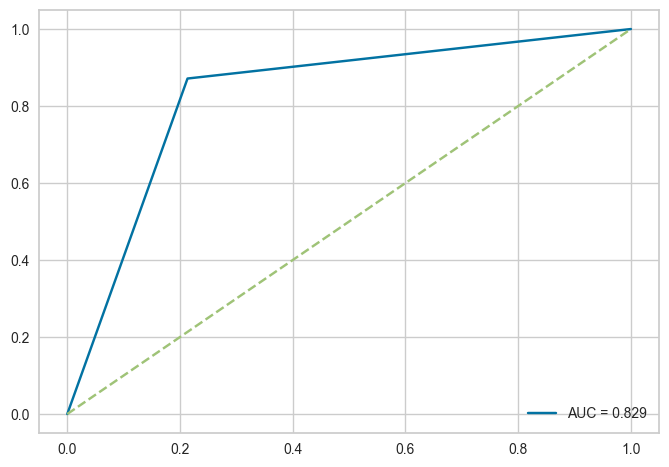

In [161]:
fpr, tpr, thresholds = roc_curve(y_mode_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

### Cross Validation

In [162]:
# no missing data
scores = cross_val_score(SVC(tol=0.001, C=1.5, kernel='rbf', random_state=0), 
                         X_nomiss_scaled, 
                         y_nomiss, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(3))

[0.765 0.831 0.807 0.819 0.819]
0.808


In [163]:
# knn for missing replacement data
scores = cross_val_score(SVC(tol=0.001, C=2.0, kernel='rbf', random_state=0), 
                         X_knn_scaled, 
                         y_knn, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(3))

[0.782 0.828 0.828 0.792 0.807]
0.808


In [164]:
# mode for missing replacement data
scores = cross_val_score(SVC(tol=0.001, C=1.5, kernel='rbf', random_state=0), 
                         X_mode_scaled, 
                         y_mode, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(3))

[0.777 0.823 0.797 0.818 0.812]
0.805


## Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
nomiss_logist = LogisticRegression(random_state=0)
nomiss_logist.fit(x_nomiss_training_scaled,
                  y_nomiss_training)

LogisticRegression(random_state=0)

In [167]:
prediction = nomiss_logist.predict(x_nomiss_test_scaled)
print(classification_report(y_nomiss_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79        63
           1       0.79      0.77      0.78        62

    accuracy                           0.78       125
   macro avg       0.78      0.78      0.78       125
weighted avg       0.78      0.78      0.78       125



In [168]:
nomiss_logist.score(x_nomiss_training_scaled,
                  y_nomiss_training) #check for overfitting

0.8085106382978723

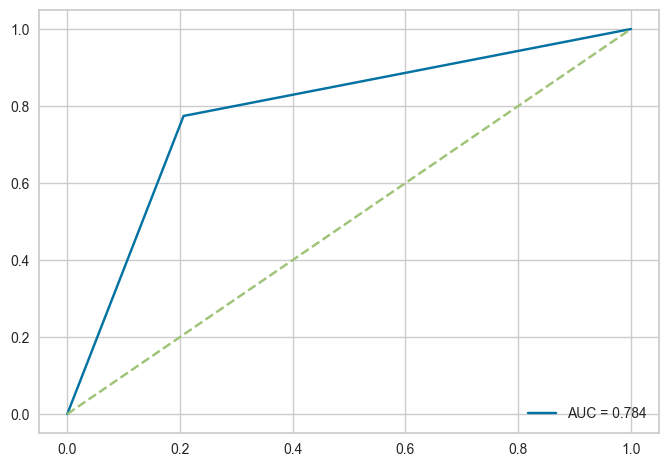

In [169]:
fpr, tpr, thresholds = roc_curve(y_nomiss_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

In [170]:
knn_logist = LogisticRegression(random_state=0)
knn_logist.fit(x_knn_training_scaled,
                  y_knn_training)

LogisticRegression(random_state=0)

In [171]:
prediction = knn_logist.predict(x_knn_test_scaled)
print(classification_report(y_knn_test,prediction))

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80        75
         1.0       0.78      0.81      0.80        70

    accuracy                           0.80       145
   macro avg       0.80      0.80      0.80       145
weighted avg       0.80      0.80      0.80       145



In [172]:
knn_logist.score(x_knn_training_scaled,
                    y_knn_training) #check for overfitting

0.8051470588235294

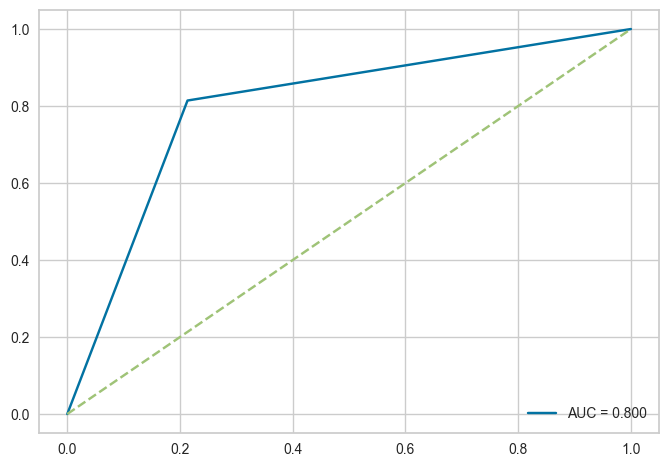

In [173]:
fpr, tpr, thresholds = roc_curve(y_knn_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

In [174]:
mode_logist = LogisticRegression(random_state=0)
mode_logist.fit(x_mode_training_scaled,
               y_mode_training)

LogisticRegression(random_state=0)

In [175]:
prediction = mode_logist.predict(x_mode_test_scaled)
print(classification_report(y_mode_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        75
           1       0.79      0.84      0.81        70

    accuracy                           0.81       145
   macro avg       0.81      0.81      0.81       145
weighted avg       0.82      0.81      0.81       145



In [176]:
mode_logist.score(x_mode_training_scaled,
                 y_mode_training) #check for overfitting

0.7916666666666666

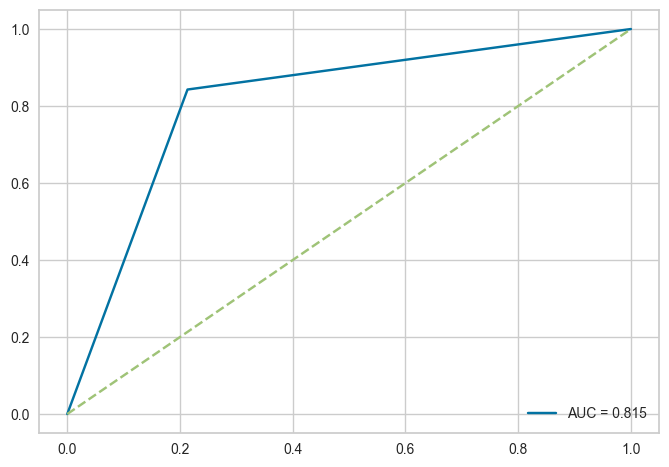

In [177]:
fpr, tpr, thresholds = roc_curve(y_mode_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

### Cross Validation

In [178]:
# no missing data
scores = cross_val_score(LogisticRegression(random_state=0), 
                         X_nomiss_scaled, 
                         y_nomiss, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(3))

[0.765 0.831 0.777 0.807 0.831]
0.802


In [179]:
# knn for missing replacement data
scores = cross_val_score(LogisticRegression(random_state=0), 
                         X_knn_scaled, 
                         y_knn, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(3))

[0.772 0.839 0.802 0.781 0.807]
0.8


In [180]:
# mode for missing replacement data
scores = cross_val_score(LogisticRegression(random_state=0), 
                         X_mode_scaled, 
                         y_mode, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(3))

[0.767 0.828 0.786 0.786 0.807]
0.795


## XGBoost

In [181]:
import xgboost as xgb

In [182]:
parameters = {'learning_rate': [0.001,0.01, 0.02],
              'n_estimators': [10,40,100,150],
              'max_depth': [3, 4, 5 ,6 ,7],
              'gamma' : [0.5, 1, 1.5, 2, 5]}
grid_search_nomiss = GridSearchCV(estimator = xgb.XGBClassifier(random_state=0),param_grid = parameters, cv=5)
grid_search_nomiss.fit(X_nomiss, y_nomiss)
print(grid_search_nomiss.best_params_) , print(grid_search_nomiss.best_score_)

{'gamma': 1.5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 40}
0.8156626506024096


(None, None)

In [183]:
nomiss_xgboost = xgb.XGBClassifier(learning_rate = 0.01 ,n_estimators = 40,max_depth = 5,gamma = 1.5 , random_state=0)
nomiss_xgboost.fit(x_nomiss_training_scaled,
                   y_nomiss_training)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [184]:
prediction = nomiss_xgboost.predict(x_nomiss_test_scaled)
print(classification_report(y_nomiss_test,prediction))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        63
           1       0.82      0.74      0.78        62

    accuracy                           0.79       125
   macro avg       0.79      0.79      0.79       125
weighted avg       0.79      0.79      0.79       125



In [185]:
nomiss_xgboost.score(x_nomiss_training_scaled,
                     y_nomiss_training) #check for overfitting

0.8241134751773049

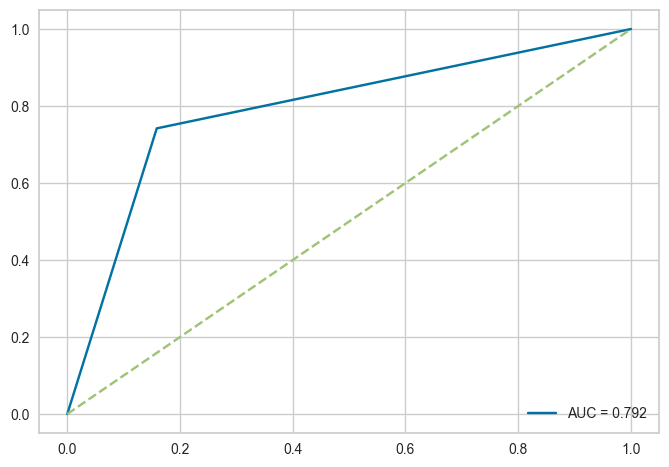

In [186]:
fpr, tpr, thresholds = roc_curve(y_nomiss_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

In [187]:
parameters = {'learning_rate': [0.001,0.01, 0.02],
              'n_estimators': [10,40,100,150],
              'max_depth': [3, 4, 5 ,6 ,7],
              'gamma' : [0.5, 1, 1.5, 2, 5]}
grid_search_knn = GridSearchCV(estimator = xgb.XGBClassifier(random_state=0),param_grid = parameters, cv=5)
grid_search_knn.fit(X_nomiss, y_nomiss)
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

{'gamma': 1.5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 40}
0.8156626506024096


In [188]:
knn_xgboost = xgb.XGBClassifier(learning_rate = 0.01 ,n_estimators = 40,max_depth = 5,gamma = 1.5 , random_state=0)
knn_xgboost.fit(x_knn_training_scaled,
                   y_knn_training)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [189]:
prediction = knn_xgboost.predict(x_knn_test_scaled)
print(classification_report(y_knn_test,prediction))

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80        75
         1.0       0.81      0.71      0.76        70

    accuracy                           0.78       145
   macro avg       0.78      0.78      0.78       145
weighted avg       0.78      0.78      0.78       145



In [190]:
knn_xgboost.score(x_knn_training_scaled,
                     y_knn_training) #check for overfitting

0.8284313725490197

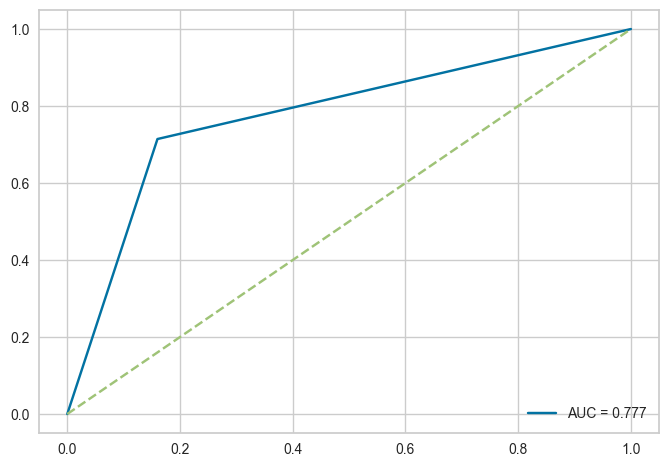

In [191]:
fpr, tpr, thresholds = roc_curve(y_knn_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

In [192]:
parameters = {'learning_rate': [0.001,0.01, 0.02],
              'n_estimators': [10,40,100,150],
              'max_depth': [3, 4, 5 ,6 ,7],
              'gamma' : [0.5, 1, 1.5, 2, 5]}
grid_search_mode = GridSearchCV(estimator = xgb.XGBClassifier(random_state=0),param_grid = parameters, cv=5)
grid_search_mode.fit(X_nomiss, y_nomiss)
print(grid_search_mode.best_params_)
print(grid_search_mode.best_score_)

{'gamma': 1.5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 40}
0.8156626506024096


In [269]:
mode_xgboost = xgb.XGBClassifier(learning_rate = 0.01 ,n_estimators = 40,max_depth = 5,gamma = 1.5 , random_state=0)
mode_xgboost.fit(x_mode_training_scaled,
                y_mode_training)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [270]:
prediction = mode_xgboost.predict(x_mode_test_scaled)
print(classification_report(y_mode_test,prediction))

              precision    recall  f1-score   support

           0       0.64      0.96      0.77        75
           1       0.91      0.43      0.58        70

    accuracy                           0.70       145
   macro avg       0.78      0.69      0.68       145
weighted avg       0.77      0.70      0.68       145



In [195]:
mode_xgboost.score(x_mode_training_scaled,
                  y_mode_training) #check for overfitting

0.8149509803921569

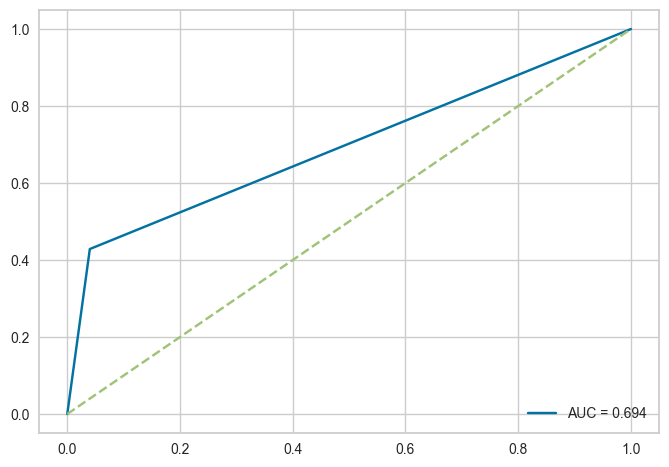

In [196]:
fpr, tpr, thresholds = roc_curve(y_mode_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

### Cross Validation

In [197]:
# no missing data
scores = cross_val_score(xgb.XGBClassifier(learning_rate = 0.01 ,n_estimators = 40,max_depth = 5,gamma = 1.5 , random_state=0), 
                         X_nomiss_scaled, 
                         y_nomiss, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(5))

[0.795 0.831 0.825 0.813 0.813]
0.81566


In [198]:
# knn for missing replacement data
scores = cross_val_score(xgb.XGBClassifier(learning_rate = 0.01 ,n_estimators = 40,max_depth = 5,gamma = 1.5 , random_state=0), 
                         X_knn_scaled, 
                         y_knn, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(5))

[0.813 0.839 0.839 0.781 0.812]
0.81686


In [271]:
# mode for missing replacement data
scores = cross_val_score(xgb.XGBClassifier(learning_rate = 0.01 ,n_estimators = 40,max_depth = 5,gamma = 1.5 , random_state=0), 
                         X_mode_scaled, 
                         y_mode, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(3))

[0.793 0.828 0.797 0.823 0.802]
0.809


## Neural Network

In [200]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

In [201]:
def create_model():
    model = Sequential()
    model.add(Dense(24, activation='relu', input_dim = 4)) 
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

neuralnetwork_nomiss = KerasClassifier(model= create_model, epochs = 100, verbose = 0, random_state=0)
neuralnetwork_knn = KerasClassifier(model= create_model, epochs = 100, verbose = 0, random_state=0)
neuralnetwork_mode = KerasClassifier(model= create_model, epochs = 100, verbose = 0, random_state=0)

In [202]:
neuralnetwork_nomiss.fit(x_nomiss_training_scaled, 
                  y_nomiss_training,
                  epochs=100)
prediction = neuralnetwork_nomiss.predict(x_nomiss_test_scaled)

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [203]:
print(classification_report(y_nomiss_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        63
           1       0.78      0.82      0.80        62

    accuracy                           0.80       125
   macro avg       0.80      0.80      0.80       125
weighted avg       0.80      0.80      0.80       125



In [204]:
neuralnetwork_nomiss.score(x_nomiss_training_scaled,
                           y_nomiss_training) #check for overfitting

0.8283687943262411

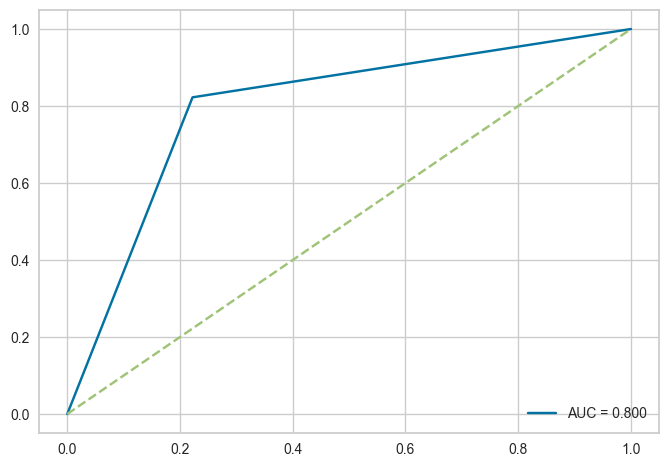

In [205]:
fpr, tpr, thresholds = roc_curve(y_nomiss_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

In [206]:
neuralnetwork_knn.fit(x_knn_training_scaled, 
                  y_knn_training,
                  epochs=100)
prediction = neuralnetwork_knn.predict(x_knn_test_scaled)

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [208]:
print(classification_report(y_knn_test,prediction))

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.81        75
         1.0       0.78      0.84      0.81        70

    accuracy                           0.81       145
   macro avg       0.81      0.81      0.81       145
weighted avg       0.81      0.81      0.81       145



In [207]:
neuralnetwork_knn.score(x_knn_training_scaled,
                           y_knn_training) #check for overfitting

0.8272058823529411

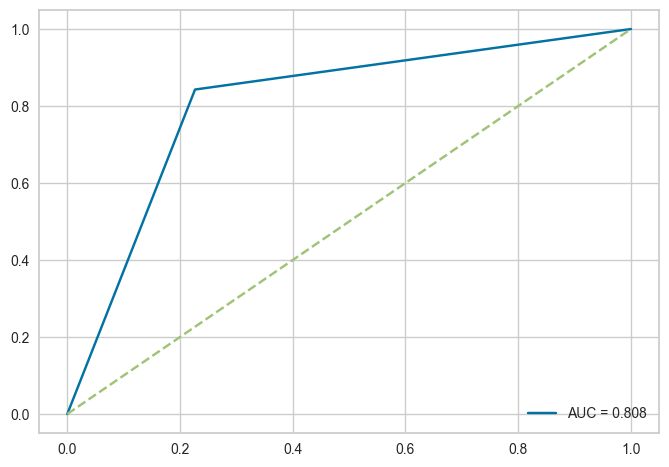

In [209]:
fpr, tpr, thresholds = roc_curve(y_knn_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

In [210]:
neuralnetwork_mode.fit(x_mode_training_scaled, 
                  y_mode_training,
                  epochs=100)
prediction = neuralnetwork_mode.predict(x_mode_test_scaled)

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [211]:
print(classification_report(y_mode_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81        75
           1       0.78      0.84      0.81        70

    accuracy                           0.81       145
   macro avg       0.81      0.81      0.81       145
weighted avg       0.81      0.81      0.81       145



In [212]:
neuralnetwork_mode.score(x_mode_training_scaled,
                         y_mode_training) #check for overfitting

0.8137254901960784

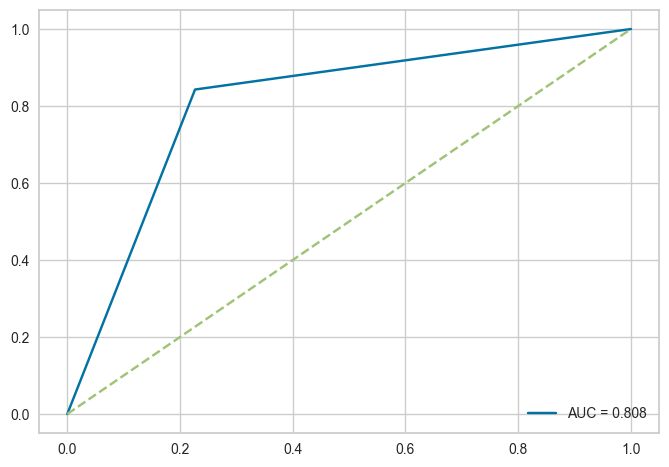

In [214]:
fpr, tpr, thresholds = roc_curve(y_mode_test, prediction)
plt.plot(fpr,tpr,label = 'AUC = %0.3f' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'g--')
plt.legend(loc=4)
plt.show()

### Cross Validation

In [215]:
# no missing data
scores = cross_val_score(neuralnetwork_nomiss, 
                         X_nomiss_scaled, 
                         y_nomiss, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(5))

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[0.777 0.843 0.795 0.819 0.825]
0.81205


In [216]:
# knn for missing replacement data
scores = cross_val_score(neuralnetwork_knn, 
                         X_knn_scaled, 
                         y_knn, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(5))

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim`

[0.767 0.833 0.828 0.802 0.802]
0.80649


In [217]:
# mode for missing replacement data
scores = cross_val_score(neuralnetwork_mode, 
                         X_mode_scaled, 
                         y_mode, 
                         cv=5)
# Print the accuracy for each fold:
print(scores.round(3))

# And the mean accuracy of all 5 folds:
print(scores.mean().round(3))

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim`

[0.767 0.833 0.797 0.802 0.797]
0.799


# Results

The focus of this project is to implement an algorithm that better predicts the severity of cancer. Considering this issue, I believe that accuracy or AUC are not the only metrics to be considered. I believe that recall for malignant cancer should also be considered.

Obs: Type II error (A test result which wrongly indicates that a particular condition or attribute is absent) + recall (for positive condition) = 1. That way, the highest the recall the smaller is erro 2 type.

Also, no model has overfitted.

**Decision Tree**
* No missing values data: 
	* Accuracy = 0.768
	* Recall = 0.76
	* ROC-AUC = 0.768
* KNN to input missing values:
	* Accuracy = 0.83
	* Recall = 0.77
	* ROC-AUC = 0.826
* Mode to input missing values:
	* Accuracy = 0.81
	* Recall = 0.81
	* ROC-AUC = 0.814

KNN were better for Accuracy and ROC-AUC but Mode had higher recall.

**Random Forest**
* No missing values data: 
	* Accuracy = 0.80
	* Recall = 0.81
	* ROC-AUC = 0.80
* KNN to input missing values:
	* Accuracy = 0.81
	* Recall = 0.83
	* ROC-AUC = 0.808
* Mode to input missing values:
	* Accuracy = 0.81
	* Recall = 0.84
	* ROC-AUC = 0.815

Mode is the winner.

**SVM**
* No missing values data: 
	* Accuracy = 0.78
	* Recall = 0.82
	* ROC-AUC = 0.776
* KNN to input missing values:
	* Accuracy = 0.81
	* Recall = 0.81
	* ROC-AUC = 0.807
* Mode to input missing values:
	* Accuracy = 0.83
	* Recall = 0.87
	* ROC-AUC = 0.829

Mode is the winner.

**Logistic Regression**
* No missing values data: 
	* Accuracy = 0.78
	* Recall = 0.77
	* ROC-AUC = 0.784
* KNN to input missing values:
	* Accuracy = 0.80
	* Recall = 0.81
	* ROC-AUC = 0.800
* Mode to input missing values:
	* Accuracy = 0.81
	* Recall = 0.84
	* ROC-AUC = 0.815

Mode is the winner.

**XGBoost**
* No missing values data: 
	* Accuracy = 0.79
	* Recall = 0.74
	* ROC-AUC = 0.792
* KNN to input missing values:
	* Accuracy = 0.78
	* Recall = 0.71
	* ROC-AUC = 0.777
* Mode to input missing values:
	* Accuracy = 0.70
	* Recall = 0.43
	* ROC-AUC = 0.694

No missing is the winner.

**Neural Network**
* No missing values data: 
	* Accuracy = 0.80
	* Recall = 0.82
	* ROC-AUC = 0.800
* KNN to input missing values:
	* Accuracy = 0.81
	* Recall = 0.84
	* ROC-AUC = 0.808
* Mode to input missing values:
	* Accuracy = 0.81
	* Recall = 0.84
	* ROC-AUC = 0.808

Mode and KNN are even.

***Mode was the winner, and the best model for mode data is SVM.***